In [1]:
import pandas as pd
from sodapy import Socrata


client = Socrata("data.cdc.gov",None)
results = client.get("r8kw-7aab",limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
0,2020-05-15T00:00:00.000,2020-02-01T00:00:00.000,2020-02-01T00:00:00.000,By week,United States,Week-ending,0,57535,0.97,3705,0,472,4177,NaN
1,2020-05-15T00:00:00.000,2020-02-08T00:00:00.000,2020-02-08T00:00:00.000,By week,United States,Week-ending,1,58140,0.97,3703,0,506,4210,NaN
2,2020-05-15T00:00:00.000,2020-02-15T00:00:00.000,2020-02-15T00:00:00.000,By week,United States,Week-ending,0,57480,0.98,3734,0,535,4269,NaN
3,2020-05-15T00:00:00.000,2020-02-22T00:00:00.000,2020-02-22T00:00:00.000,By week,United States,Week-ending,2,57510,0.99,3602,0,553,4157,NaN
4,2020-05-15T00:00:00.000,2020-02-29T00:00:00.000,2020-02-29T00:00:00.000,By week,United States,Week-ending,7,57784,1,3714,5,625,4341,NaN


In [2]:
float_cols=['total_deaths', 'percent_of_expected_deaths', 'pneumonia_deaths','pneumonia_and_covid_deaths', 'influenza_deaths', 'pneumonia_influenza_or_covid']
date_cols=['data_as_of','start_week','end_week']
def transform_df(df,date_cols,float_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])
    for col in float_cols:
        df[col] = df[col].astype(float)
    return df.drop_duplicates(subset=['start_week','state','indicator'],keep='last').reset_index(drop=True)

results_df = pd.DataFrame.from_records(results).pipe(transform_df,date_cols,float_cols)

results_df.head()

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
0,2020-05-15,2020-02-01,2020-02-01,By week,United States,Week-ending,0,57535.0,0.97,3705.0,0.0,472.0,4177.0,NaN
1,2020-05-15,2020-02-08,2020-02-08,By week,United States,Week-ending,1,58140.0,0.97,3703.0,0.0,506.0,4210.0,NaN
2,2020-05-15,2020-02-15,2020-02-15,By week,United States,Week-ending,0,57480.0,0.98,3734.0,0.0,535.0,4269.0,NaN
3,2020-05-15,2020-02-22,2020-02-22,By week,United States,Week-ending,2,57510.0,0.99,3602.0,0.0,553.0,4157.0,NaN
4,2020-05-15,2020-02-29,2020-02-29,By week,United States,Week-ending,7,57784.0,1.00,3714.0,5.0,625.0,4341.0,NaN


In [3]:
results_df.start_week.unique()

array(['2020-02-01T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-22T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-14T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-18T00:00:00.000000000',
       '2020-04-25T00:00:00.000000000', '2020-05-02T00:00:00.000000000',
       '2020-05-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [4]:
results_df['state'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b084884d0>)

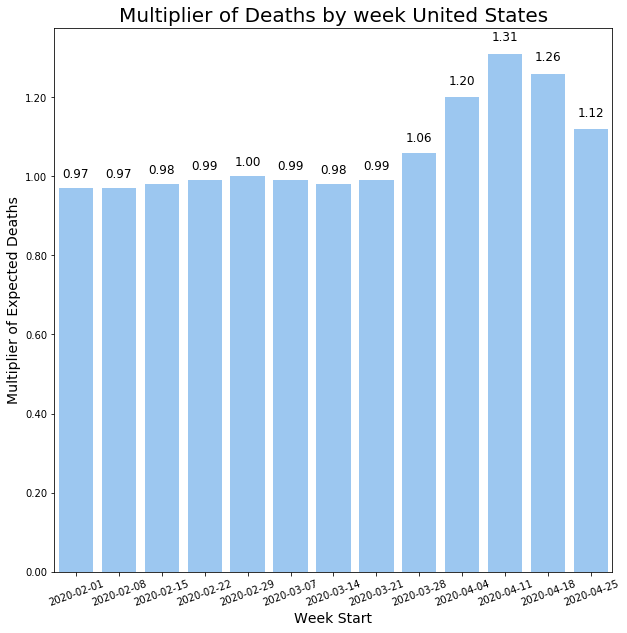

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
%matplotlib inline

def autolabel(rects, ax, loc = 1.02, perc = True, ha = 'center'):
    # attach some text labels

    for rect in rects:
        height = rect.get_height()
        if perc:
            bar_label = '%1.1f' % float(height*100) + "%"
        else:
            bar_label = '%1.2f' % float(height)
        ax.text(rect.get_x() + rect.get_width()/2., loc*height,
                bar_label,
                ha=ha, va='bottom', fontsize = 12)

def plot_death_bar(df,state='United States',with_multiplier='percent'):
    data = df[df['state']==state]
    fig,ax = plt.subplots(figsize=(10,10))
    if with_multiplier=='percent':
        formatter = FuncFormatter(lambda y, pos:"%d%%" % (y*100))
    else:
        formatter = FuncFormatter(lambda y, pos:"%.2f" % (y))
#     data['percent_of_expected_deaths']-=1
    sns.barplot(x='start_week',y='percent_of_expected_deaths',data=data,color='dodgerblue',alpha=.5)
#     ax.set_xticks(data['start_week'])
    percent = (with_multiplier=='percent')
    autolabel(ax.patches,ax,perc=percent)
    ax.xaxis.set_tick_params(rotation=20)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticklabels(data['start_week'].dt.strftime('%Y-%m-%d'))
    if with_multiplier=='percent':
        ax.set_title('Percent of Deaths by week {}'.format(state),fontsize=20)
        ax.set_ylabel('Percent of Expected Deaths',fontsize=14)
    else:
        ax.set_title('Multiplier of Deaths by week {}'.format(state),fontsize=20)
        ax.set_ylabel('Multiplier of Expected Deaths',fontsize=14)
    ax.set_xlabel("Week Start",fontsize=14)
    return fig,ax

def plot_death_line(df,state_list=[]):
    state_list = ['United States']+state_list
    data = df[df['state'].isin(state_list)]
    fig,ax = plt.subplots(figsize=(10,10))
    formatter = FuncFormatter(lambda y, pos:"%d%%" % (y*100))
    sns.lineplot(x='start_week',y='percent_of_expected_deaths',data=data,hue='state')
#     ax.set_xticks(data['start_week'])
#     autolabel(ax.patches,ax)
    ax.xaxis.set_tick_params(rotation=20)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticks(data['start_week'].drop_duplicates())
#     ax.set_xticklabels(data['start_week'].drop_duplicates().dt.strftime('%Y-%m-%d').iloc[::2])
#     ax.set_xticklabels(data['start_week'].dt.strftime('%Y-%m-%d'))
    ax.set_title('Percent of Deaths by week US',fontsize=20)
    ax.set_ylabel('Percent of Expected Deaths',fontsize=14)
    ax.set_xlabel("Week Start",fontsize=14)
    return fig,ax

plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],with_multiplier='blue')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b07f01850>)

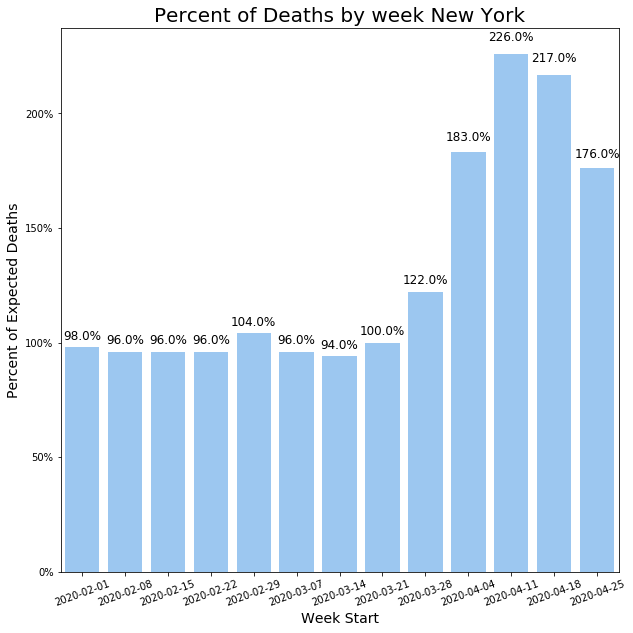

In [6]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New York')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b07e191d0>)

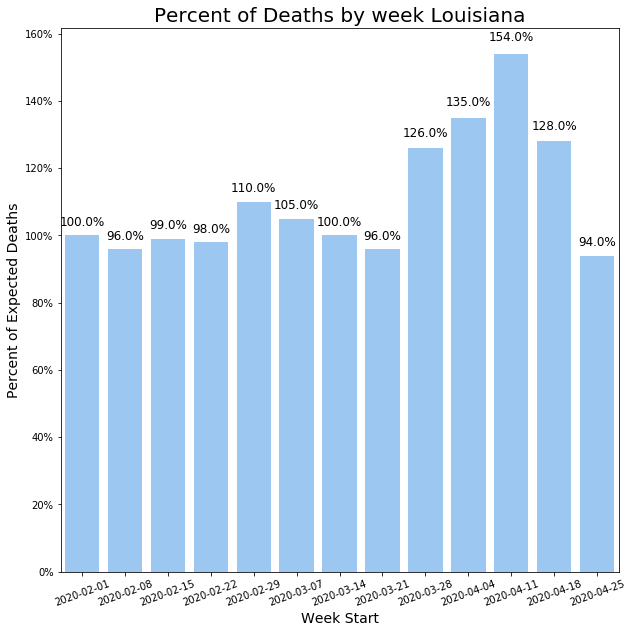

In [7]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Louisiana')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b07d86690>)

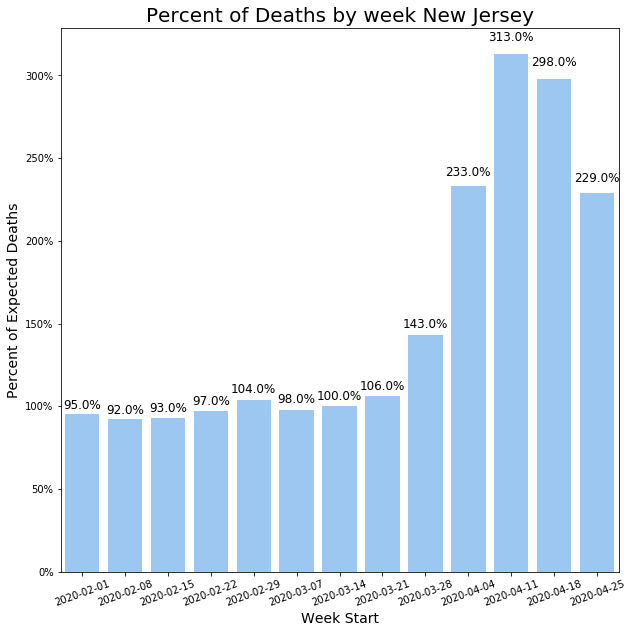

In [8]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New Jersey')

/home/jaalhashash/miniconda/envs/jawsem_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b07aca650>)

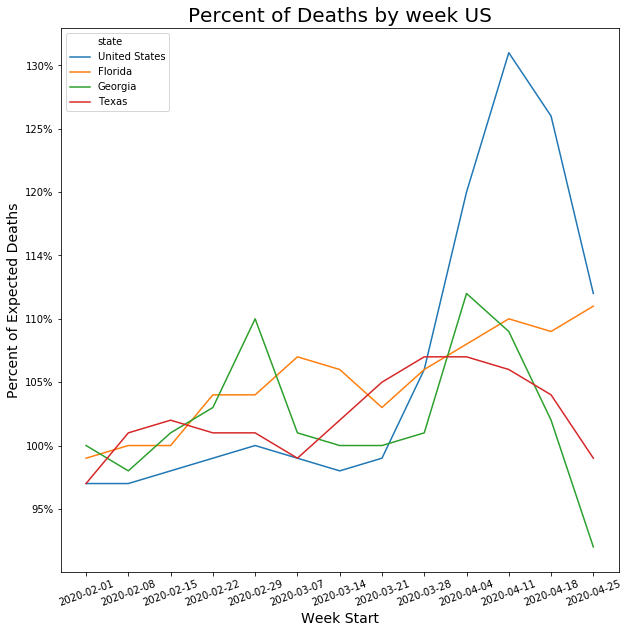

In [9]:
plot_death_line(results_df[results_df['start_week']<'2020-05-01'],['Florida','Georgia','Texas'])

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b079c4c90>)

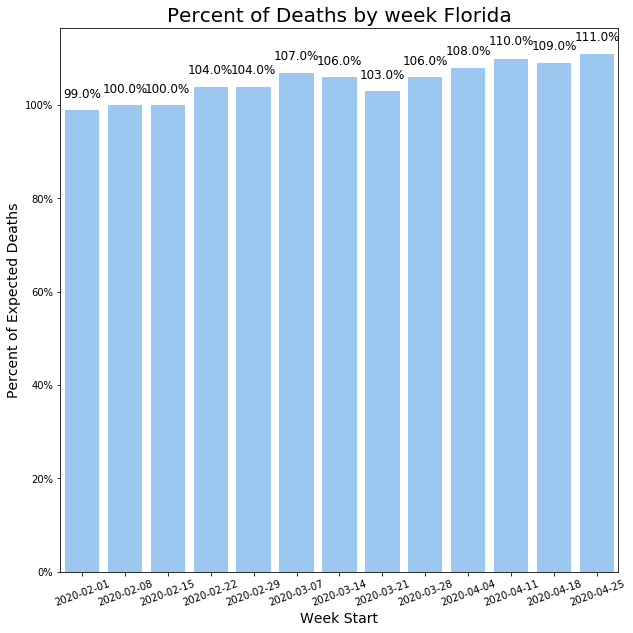

In [10]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Florida')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b060f9390>)

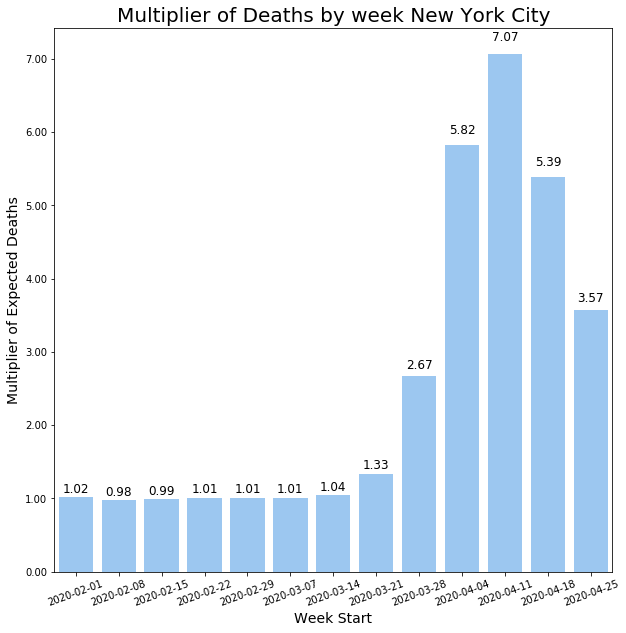

In [11]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New York City',with_multiplier='yes')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b0604abd0>)

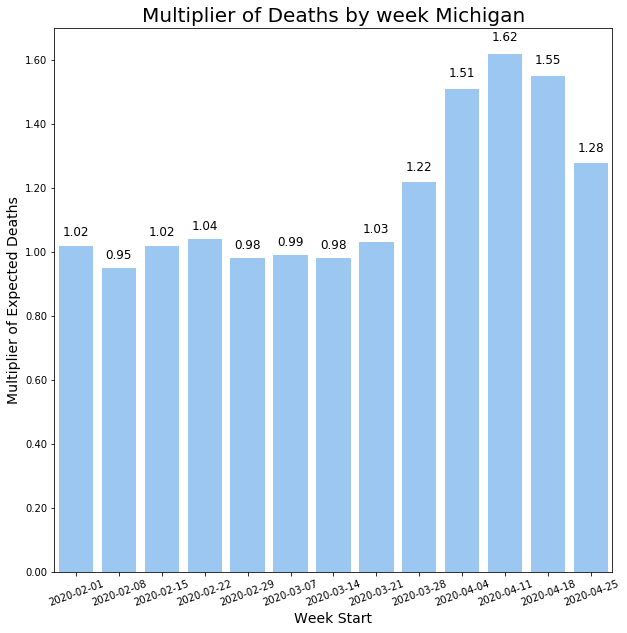

In [12]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Michigan',with_multiplier='yes')

In [13]:
results_df.sort_values(by='percent_of_expected_deaths',ascending=False).head(20)

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
520,2020-05-15,2020-04-11,2020-04-11,By week,New York City,Week-ending,4412,7535.0,7.07,2021.0,1648.0,321.0,4796.0,NaN
519,2020-05-15,2020-04-04,2020-04-04,By week,New York City,Week-ending,2944,5992.0,5.82,1693.0,1238.0,209.0,3408.0,NaN
521,2020-05-15,2020-04-18,2020-04-18,By week,New York City,Week-ending,3470,5474.0,5.39,1388.0,1225.0,170.0,3636.0,NaN
522,2020-05-15,2020-04-25,2020-04-25,By week,New York City,Week-ending,2125,3523.0,3.57,936.0,822.0,76.0,2244.0,NaN
475,2020-05-15,2020-04-11,2020-04-11,By week,New Jersey,Week-ending,2014,4457.0,3.13,1309.0,1018.0,NaN,2308.0,One or more data cells have counts between 1–9...
476,2020-05-15,2020-04-18,2020-04-18,By week,New Jersey,Week-ending,2004,4225.0,2.98,1171.0,937.0,NaN,2240.0,One or more data cells have counts between 1–9...
518,2020-05-15,2020-03-28,2020-03-28,By week,New York City,Week-ending,911,2745.0,2.67,589.0,344.0,46.0,1164.0,NaN
474,2020-05-15,2020-04-04,2020-04-04,By week,New Jersey,Week-ending,1108,3407.0,2.33,856.0,573.0,10.0,1399.0,NaN
477,2020-05-15,2020-04-25,2020-04-25,By week,New Jersey,Week-ending,1326,3118.0,2.29,845.0,660.0,NaN,1513.0,One or more data cells have counts between 1–9...
505,2020-05-15,2020-04-11,2020-04-11,By week,New York,Week-ending,1826,4444.0,2.26,1259.0,957.0,11.0,2135.0,NaN


In [14]:
(results_df['start_week']<'2020-05-01').sum()

702

In [15]:
results_df[results_df['state'].isin(['United States'])]

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
0,2020-05-15,2020-02-01,2020-02-01,By week,United States,Week-ending,0,57535.0,0.97,3705.0,0.0,472.0,4177.0,NaN
1,2020-05-15,2020-02-08,2020-02-08,By week,United States,Week-ending,1,58140.0,0.97,3703.0,0.0,506.0,4210.0,NaN
2,2020-05-15,2020-02-15,2020-02-15,By week,United States,Week-ending,0,57480.0,0.98,3734.0,0.0,535.0,4269.0,NaN
3,2020-05-15,2020-02-22,2020-02-22,By week,United States,Week-ending,2,57510.0,0.99,3602.0,0.0,553.0,4157.0,NaN
4,2020-05-15,2020-02-29,2020-02-29,By week,United States,Week-ending,7,57784.0,1.00,3714.0,5.0,625.0,4341.0,NaN
5,2020-05-15,2020-03-07,2020-03-07,By week,United States,Week-ending,32,57373.0,0.99,3796.0,16.0,608.0,4419.0,NaN
6,2020-05-15,2020-03-14,2020-03-14,By week,United States,Week-ending,51,55856.0,0.98,3781.0,26.0,598.0,4403.0,NaN
7,2020-05-15,2020-03-21,2020-03-21,By week,United States,Week-ending,517,55965.0,0.99,4291.0,237.0,518.0,5083.0,NaN
8,2020-05-15,2020-03-28,2020-03-28,By week,United States,Week-ending,2897,59074.0,1.06,5804.0,1314.0,420.0,7758.0,NaN
9,2020-05-15,2020-04-04,2020-04-04,By week,United States,Week-ending,8893,66978.0,1.20,9208.0,4260.0,445.0,14066.0,NaN


In [16]:
results_df['data_as_of'].value_counts()

2020-05-15    810
Name: data_as_of, dtype: int64

In [17]:
NY = results_df[results_df['state']=='New York City'].reset_index(drop=True)
NY['start_week'].dt.strftime('%Y-%m-%d')

0     2020-02-01
1     2020-02-08
2     2020-02-15
3     2020-02-22
4     2020-02-29
5     2020-03-07
6     2020-03-14
7     2020-03-21
8     2020-03-28
9     2020-04-04
10    2020-04-11
11    2020-04-18
12    2020-04-25
13    2020-05-02
14    2020-05-09
Name: start_week, dtype: object

/home/jaalhashash/miniconda/envs/jawsem_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


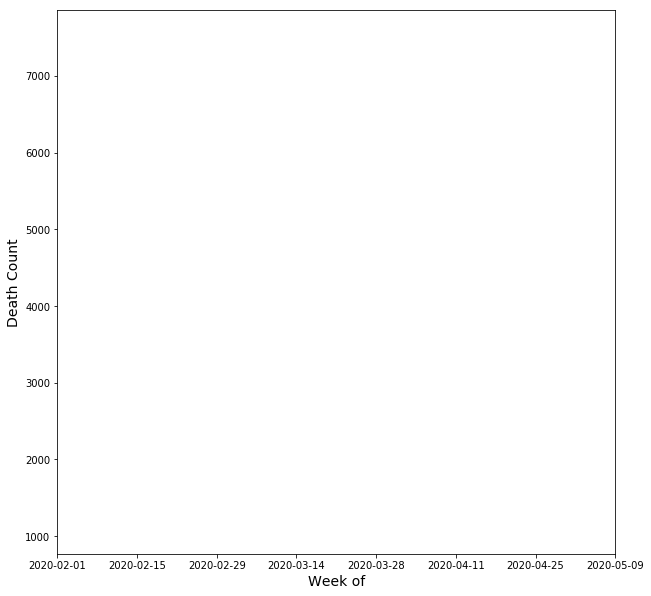

In [18]:
from celluloid import Camera
from IPython.display import HTML

fig,ax = plt.subplots(figsize=(10,10))
camera = Camera(fig)
for i in range(NY.shape[0]):
    NY.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
    ax.set_xticklabels(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
    ax.text(0.5,1.05,'Death Count in NYC: Week of {}: {:.0f}'.format(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[i],NY['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
    ax.set_ylabel('Death Count',fontsize=14)
    ax.set_xlabel("Week of",fontsize=14)
    ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
    camera.snap()
    
animation = camera.animate(interval=500)
animation.save('weekly_deaths_nyc.mp4')

# HTML(animation.to_html5_video())

In [19]:
import os

os.system("ffmpeg -i weekly_deaths_nyc.mp4 weekly_deaths_nyc.gif")

256

<img src="weekly_deaths_nyc.gif" width="600">

In [20]:
county_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [21]:
county_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [22]:
import geopandas as gpd

geo_df = gpd.read_file('./shape_files/cb_2018_us_county_500k.shp')

In [23]:
geo_df['fips'] = geo_df['GEOID'].astype(float)

In [24]:
final_geo_df = county_data.merge(geo_df,how='left',on='fips')

In [25]:
final_geo_df.head()

,date,county,state,fips,cases,deaths,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,2020-01-21,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."
1,2020-01-22,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."
2,2020-01-23,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."
3,2020-01-24,Cook,Illinois,17031.0,1,0,17,031,01784766,0500000US17031,17031,Cook,06,2.447371e+09,1.786313e+09,"POLYGON ((-88.26364 42.06687, -88.25835 42.066..."
4,2020-01-24,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."


In [26]:
final_geo_df = final_geo_df[~final_geo_df['state'].isin(['Hawaii','Alaska','Puerto Rico'])].reset_index(drop=True)

In [27]:
day_list = final_geo_df['date'].unique().tolist()[11:]


In [28]:
import mapclassify
import numpy as np

scheme = mapclassify.NaturalBreaks(final_geo_df['cases'],k=5)


In [29]:
final_geo_df.dropna(inplace=True)


In [30]:
import geoplot
import geoplot.crs as gcrs
from celluloid import Camera
from IPython.display import HTML
# contiguous_usa = gpd.read_file(geoplot.datasets.get_path('contiguous_usa'))
# ax3 = geoplot.webmap(contiguous_usa,projection=gcrs.WebMercator(),figsize=(15,10))
# fig3 = ax3.get_figure()
# camera = Camera(fig3)
# for day in day_list[::5]:
#     print(day)
#     geoplot.webmap(contiguous_usa,projection=gcrs.WebMercator(),ax=ax3)

#     test_geo = gpd.GeoDataFrame(final_geo_df[final_geo_df['date']==day])
#     geoplot.choropleth(
#     test_geo, hue='cases', 
#     cmap='Reds', ax = ax3, edgecolor=None,scheme = scheme,legend=True, legend_kwargs={'bbox_to_anchor':(.9,.2)}
#  )
#     ax3.text(0.5,1,'Total Covid Cases by Country: {}'.format(day),fontsize=20,horizontalalignment='center',transform = ax3.transAxes)
# #     ax3.axis('off')
    
#     camera.snap()
# animation = camera.animate(interval=500)
# HTML(animation.to_html5_video())


In [31]:
# NY = results_df[results_df['state']=='New York City'].reset_index(drop=True)
# NY.head()

In [32]:
# NY['start_week'].dt.strftime('%Y-%m-%d')

In [33]:
# fig,ax = plt.subplots(figsize=(10,10))
# camera = Camera(fig)
# for i in range(NY.shape[0]):
#     NY.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
#     ax.set_xticklabels(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
#     ax.text(0.5,1.05,'Death Count in NYC: Week of {}: {:.0f}'.format(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[i],NY['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
#     ax.set_ylabel('Death Count',fontsize=14)
#     ax.set_xlabel("Week of",fontsize=14)
#     ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
#     camera.snap()
    
# animation = camera.animate(interval=500)
# animation.save('weekly_deaths_nyc.mp4')

# HTML(animation.to_html5_video())
